<a href="https://colab.research.google.com/github/Asvikap/Sentimental_Analysis/blob/main/Swiggy_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/swiggydataset.csv')
df

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,False,syamantak1,1,"6,19,59,419"
1,7/18/2019 22:43,0,102,129,@SwiggyCares I hope so.,0,False,Bharatbbhushn,2,"14,32,84,383"
2,7/18/2019 22:37,0,102,129,@SwiggyCares I think you have the order detail...,0,False,Bharatbbhushn,3,"14,32,84,383"
3,7/18/2019 22:35,0,13,16,"@swiggy_in People are complaining here also, i...",0,False,taifkhalid01,4,"8,30,34,00,00,00,00,00,000"
4,7/18/2019 22:25,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,False,Bharatbbhushn,5,"14,32,84,383"
...,...,...,...,...,...,...,...,...,...,...
16707,07-11-2019 12:13,0,0,2,@SwiggyCares they said as delivery box is not ...,0,False,UmmeMohammad18,"16,708","11,44,99,00,00,00,00,00,000"
16708,07-11-2019 12:12,0,106,146,"@swiggy_in Deliver to karta nahi, install kyo ...",0,False,Desi_Life1,"16,709","10,39,41,00,00,00,00,00,000"
16709,07-11-2019 12:11,0,91,248,@swiggy_in thanks for spilling my drink. I wai...,0,False,Pinks_Forever_,"16,710","1,70,09,14,573"
16710,07-11-2019 12:11,0,0,2,@SwiggyCares hello there i use swigggy regular...,0,False,UmmeMohammad18,"16,711","11,44,99,00,00,00,00,00,000"


In [5]:
df.shape

(16712, 10)

In [7]:
df.isnull().sum()

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['retweeted'].unique()

array([False, nan], dtype=object)

In [14]:
import re
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  #text = re.sub(r'#','',text)
  text = re.sub(r'https?:\/\/\S+','',text)
  return text

df['full_text']=df['full_text'].apply(cleanTxt)

In [16]:
df['full_text'].replace("[^a-zA-Z0-9#]"," ",regex=True,inplace=True)

In [11]:
from wordcloud import WordCloud

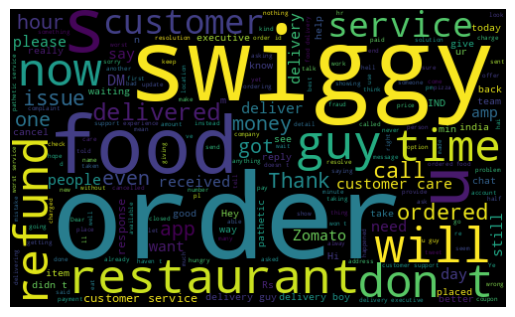

In [17]:
allWords=" ".join([twts for twts in df['full_text']] )
wordCloud = WordCloud(width =500, height=300, random_state=21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [18]:
df.head()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,2510 in The ultimate answer will b sorry ...,0,False,syamantak1,1,"6,19,59,419"
1,7/18/2019 22:43,0,102,129,I hope so,0,False,Bharatbbhushn,2,"14,32,84,383"
2,7/18/2019 22:37,0,102,129,I think you have the order details was the n...,0,False,Bharatbbhushn,3,"14,32,84,383"
3,7/18/2019 22:35,0,13,16,in People are complaining here also i know Y...,0,False,taifkhalid01,4,"8,30,34,00,00,00,00,00,000"
4,7/18/2019 22:25,0,102,129,Do you even know the meaning of your tagline ...,0,False,Bharatbbhushn,5,"14,32,84,383"


In [19]:
#timestamp splitting
df['Dates'] = pd.to_datetime(df['date']).dt.date #this first create a new column and save a new seprate data of the date
df['Time'] = pd.to_datetime(df['date']).dt.time #this create a new column and save a new seprate data of the time
df[["year", "month","day"]] = df["Dates"].astype(str).str.split("-", expand = True) #this splits the date into years months days

In [20]:
df['year'].value_counts()

2019    16712
Name: year, dtype: int64

In [21]:
df['month'].value_counts()

06    10752
07     5960
Name: month, dtype: int64

In [32]:
import nltk
nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [27]:
example = df['full_text'][50]

tokens = nltk.word_tokenize(example)
tokens

['I',
 'll',
 'be',
 'twitting',
 'you',
 'continuously',
 'until',
 'I',
 'get',
 'a',
 'call',
 'from',
 'you']

In [29]:
#parts of speech tagging
tagged = nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('ll', 'VBP'),
 ('be', 'VB'),
 ('twitting', 'VBG'),
 ('you', 'PRP'),
 ('continuously', 'RB'),
 ('until', 'IN'),
 ('I', 'PRP'),
 ('get', 'VBP'),
 ('a', 'DT'),
 ('call', 'NN'),
 ('from', 'IN'),
 ('you', 'PRP')]

In [35]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  ll/VBP
  be/VB
  twitting/VBG
  you/PRP
  continuously/RB
  until/IN
  I/PRP
  get/VBP
  a/DT
  call/NN
  from/IN
  you/PRP)


In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [37]:
sia.polarity_scores('This is soo good')

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [38]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [39]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [40]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['full_text']
    myid = row['tweet_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/16712 [00:00<?, ?it/s]

In [43]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'tweet_id'})
vaders = vaders.merge(df)

In [55]:
vaders.head()

,tweet_id,neg,neu,pos,compound,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,user_id,Dates,Time,year,month,day
0,1,0.111,0.684,0.205,0.2732,7/18/2019 22:47,0,82,219,2510 in The ultimate answer will b sorry ...,0,False,syamantak1,"6,19,59,419",2019-07-18,22:47:00,2019,07,18
1,2,0.000,0.256,0.744,0.4404,7/18/2019 22:43,0,102,129,I hope so,0,False,Bharatbbhushn,"14,32,84,383",2019-07-18,22:43:00,2019,07,18
2,3,0.000,0.929,0.071,0.0772,7/18/2019 22:37,0,102,129,I think you have the order details was the n...,0,False,Bharatbbhushn,"14,32,84,383",2019-07-18,22:37:00,2019,07,18
3,4,0.138,0.756,0.106,0.1272,7/18/2019 22:35,0,13,16,in People are complaining here also i know Y...,0,False,taifkhalid01,"8,30,34,00,00,00,00,00,000",2019-07-18,22:35:00,2019,07,18
4,5,0.000,0.722,0.278,0.6124,7/18/2019 22:25,0,102,129,Do you even know the meaning of your tagline ...,0,False,Bharatbbhushn,"14,32,84,383",2019-07-18,22:25:00,2019,07,18


In [51]:
import numpy as np
from google.colab import autoviz
df_4512188631810575618 = autoviz.get_registered_df('df_4512188631810575618')

def value_plot(df, y, sort_ascending=False, figsize=(10, 5)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4512188631810575618, *['neg'], **{})
chart

In [52]:
import numpy as np
from google.colab import autoviz
df_1305274324429237377 = autoviz.get_registered_df('df_1305274324429237377')

def value_plot(df, y, sort_ascending=False, figsize=(10, 5)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1305274324429237377, *['neu'], **{})
chart

In [53]:
import numpy as np
from google.colab import autoviz
df_1597241259035490990 = autoviz.get_registered_df('df_1597241259035490990')

def value_plot(df, y, sort_ascending=False, figsize=(10,5)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1597241259035490990, *['compound'], **{})
chart

In [54]:
import numpy as np
from google.colab import autoviz
df_8344712582787226381 = autoviz.get_registered_df('df_8344712582787226381')

def value_plot(df, y, sort_ascending=False, figsize=(10,5)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8344712582787226381, *['pos'], **{})
chart

In [57]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.4 MB/s eta 0:00:00


In [58]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [59]:
# VADER results on example
print(example)
sia.polarity_scores(example)

 I ll be twitting you continuously until I get a call from you


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [60]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.37231255, 'roberta_neu': 0.5664059, 'roberta_pos': 0.061281588}


In [61]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [62]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['full_text']
        myid = row['tweet_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/16712 [00:00<?, ?it/s]

Broke for id 15,453
